In [1]:
import numpy as np
import pylab as pl
from scipy.optimize import curve_fit
import scipy as sp

R_0 = 1.
sig, dlta = 0.15, 0.005

R = np.array([0.99, 1.02, .91, 1.03, .96, 1.09, .94, 1.05, .99, 1.06, .96, 1.12, .98, 1.10, 1.17])

Z = np.array([0.21, .55, .70, .95, 1.35, 1.70, 2.15, 2.25, 2.65, 2.95, 3.20, 3.60, 3.80, 4.20, 4.45])

N = len(R)

def Odds(sig, R, Z):

    P_SNh = ((sig*np.sqrt(2*np.pi))**(-N))*np.exp(-(1/(2*sig**2.))*sum((R - R_0)**2.))

    A = (R - R_0)/(Z**2.)
    C_1 = (-1/(2*sig**2.))*sum((R - R_0)**2.)
    C_2 = sum((R - R_0)*Z**2.)/(sig**2.)
    C_3 = (-1/(2*dlta**2.)) - sum(Z**4)/(2*sig**2.)  

    F = np.exp(C_1 + C_2*A + C_3*A**2.)

    C = ((sig*np.sqrt(2*np.pi))**(-N))/(dlta*np.sqrt(2*np.pi))

    P_HNh = C*sp.trapz(F) 

    Odds_ratio = P_HNh/P_SNh
    print('Odds ratio = %.3f' %(Odds_ratio))

    Prob = Odds_ratio/(Odds_ratio + 1)
    print('Probability = %.3f' %(Prob))
    
Odds(sig, R, Z)

Odds ratio = 283.649
Probability = 0.996


In [2]:
sig = 0.07
Odds(sig, R, Z)

Odds ratio = 1472.177
Probability = 0.999


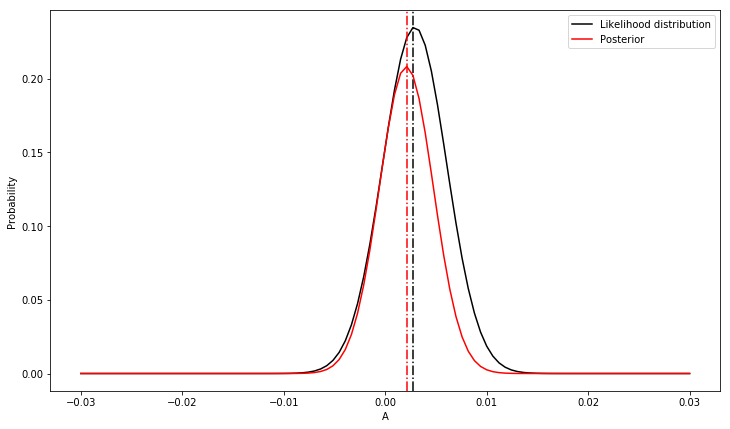

The maximum likelihood and posterior are 0.235 0.208


In [3]:
A = np.linspace(-0.03, 0.03, 100)
N = len(A)
sig, dlta = 0.15, 0.005
C_1 = (-1/(2*sig**2.))*sum((R - R_0)**2.)
C_2 = sum((R - R_0)*Z**2.)/(sig**2.)
C_3 = (-1/(2*dlta**2.)) - sum(Z**4)/(2*sig**2.)  

F = np.exp(C_1 + C_2*A + C_3*A**2.)

C = ((sig*np.sqrt(2*np.pi))**(-N))/(dlta*np.sqrt(2*np.pi))

Likelihood = F

Prior = np.exp(-(A**2.)/(2*dlta**2.))
Posterior = Prior*Likelihood
x1 = A[np.argmax(Likelihood)]
x2 = A[np.argmax(Posterior)]
pl.figure(figsize = (12, 7))
pl.plot(A, Likelihood, 'k-', label = 'Likelihood distribution')
pl.axvline(x1, color = 'k', linestyle = '-.')
pl.plot(A, Posterior, 'r-', label = 'Posterior')
pl.axvline(x2, color = 'r', linestyle = '-.')
pl.xlabel('A')
pl.ylabel('Probability')
pl.legend()
pl.savefig('Likelihood.eps', format = 'eps', dpi = 150)
pl.show()
print('The maximum likelihood and posterior are %.3f %.3f' %(max(Likelihood), max(Posterior)))